In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from scipy.optimize import fsolve
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import math
import os

In [2]:
os.getcwd()

'E:\\Users\\bondb\\OneDrive - University of Toronto\\University of Toronto @ Kaiyang Chen\\EngSci Year 4\\W APM466\\Assignment 1'

In [3]:
ISIN_list = ['CA135087E596', 'CA135087F254', 'CA135087F585', 'CA135087G328',
             'CA135087ZU15', 'CA135087H490', 'CA135087A610', 'CA135087J546',
             'CA135087J967', 'CA135087K528']

Name_list = ['CAN 0.75 Sep 20', 'CAN 0.75 Mar 21', 'CAN 0.75 Sep 21', 'CAN 0.5 Mar 22', 
             'CAN 2.75 Jun 22',' CAN 1.75 Mar 23', 'CAN 1.5 Jun 23', 'CAN 2.25 Mar 24', 
             'CAN 1.5 Sep 24', 'CAN 1.25 Mar 25']

coupon_list = [0.75, 0.75, 0.75, 0.5, 2.75, 1.75, 1.5, 2.25, 1.5, 1.25]

MatDate_list = ['2020-09-01', '2021-03-01', '2021-09-01', '2022-03-01',
                '2022-06-01', '2023-03-01', '2023-06-01', '2024-03-01', 
                '2024-09-01', '2025-03-01']

IssueDate_list = ['2015-04-13', '2015-10-19', '2016-04-11', '2016-10-11',
                  '2011-08-02', '2017-10-06', '2012-07-30', '2018-10-05',
                  '2019-04-05', '2019-10-11']

CurDate_list = ['2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10', 
                '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
                '2020-01-03', '2020-01-02']

LastCouponDate_list = ['2019-09-01', '2019-09-01', '2019-09-01', '2019-09-01',
                       '2019-12-01', '2019-09-01', '2019-12-01', '2019-09-01',
                       '2019-09-01', '2019-09-01']

NextPaymentDate_list = ['2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
                        '2020-06-01', '2020-03-01', '2020-06-01', '2020-03-01',
                        '2020-03-01', '2020-03-01']

prices_list = []

# import historical price
file  = 'APM466 Assignment 1 Data.xlsx'
for tab in ISIN_list:
    df = pd.read_excel(file, tab, skiprows = 7)
    prices_list.append(df['Close'].tolist())

# put everything together in a dict
Bond_dict = {}
for ISIN in ISIN_list:
    if ISIN not in Bond_dict.keys():
        Bond_dict[ISIN] = []

def Bond_dict_add_features(Bond_dict, feature_list):
    for ind in range(len(feature_list)):
        ISIN = ISIN_list[ind]
        Bond_dict[ISIN].append(feature_list[ind])
    return Bond_dict

# cashflow
payoff_times = [2, 3, 4, 5, 5, 7, 7, 9, 10, 11]
payoff_list = []
for ind in range(len(payoff_times)):
    temp = [100 * coupon_list[ind] / 100 / 2] * payoff_times[ind]
    temp[-1] += 100
    payoff_list.append(temp)

# AI
AI_list = []
for ind in range(len(ISIN_list)):
    temp = []
    for date in CurDate_list:
        d1 = datetime.strptime(date, "%Y-%m-%d")
        d2 = datetime.strptime(LastCouponDate_list[ind], "%Y-%m-%d")
        AI = abs((d1 - d2).days) / 365 * coupon_list[ind]
        temp.append(AI)
    AI_list.append(temp)

# Days util next payment
NextDay_list = []
for ind in range(len(ISIN_list)):
    temp = []
    for date in CurDate_list:
        d1 = datetime.strptime(date, "%Y-%m-%d")
        d2 = datetime.strptime(NextPaymentDate_list[ind], "%Y-%m-%d")
        NextDay = abs((d1 - d2).days)
        temp.append(NextDay)
    NextDay_list.append(temp)



Bond_dict = Bond_dict_add_features(Bond_dict, Name_list)
Bond_dict = Bond_dict_add_features(Bond_dict, coupon_list)
Bond_dict = Bond_dict_add_features(Bond_dict, MatDate_list)
Bond_dict = Bond_dict_add_features(Bond_dict, IssueDate_list)
Bond_dict = Bond_dict_add_features(Bond_dict, NextPaymentDate_list)
Bond_dict = Bond_dict_add_features(Bond_dict, NextDay_list)
Bond_dict = Bond_dict_add_features(Bond_dict, prices_list)
Bond_dict = Bond_dict_add_features(Bond_dict, payoff_list)
Bond_dict = Bond_dict_add_features(Bond_dict, AI_list)

# keep track of indices
name_ind = 0
coupon_ind = 1
MatDate_ind = 2
IssueDate_ind = 3
CouponDate_ind = 4
DaysNextPayment_ind = 5
price_ind = 6
cashflow_ind = 7
AI_ind = 8
# Part a)
YTM_ind = 9




## Part a) - YTM

In [5]:
# Calculate YTM
def YTM_func(r):
    eqn = 0
    for i in range(len(cashflow)):
    # The first payment is num_days from today
    # All future payment is 6 moths apart
        t = i+1
        eqn = eqn + cashflow[i] * math.exp(-r * num_days/365 + -(t-1) * r * 1/2)
    eqn = eqn - dirty_price
    return eqn
    
YTM_list = []
for ISIN in ISIN_list:
    Bond_dict_element = Bond_dict[ISIN]
    YTM = []
    for ind in range(len(Bond_dict_element[price_ind])):
        clean_price = Bond_dict_element[price_ind][ind]
        AI = Bond_dict_element[AI_ind][ind]
        dirty_price = clean_price + AI
        cashflow = Bond_dict_element[cashflow_ind]
        num_days = Bond_dict_element[DaysNextPayment_ind][ind]
        
        res = fsolve(YTM_func, 0)
        YTM.append(res)
    YTM = np.array(YTM).squeeze()
    Bond_dict_element.append(YTM)
    YTM_list.append(YTM)

YTM_list = np.array(YTM_list)

Text(0, 0.5, 'YTM')

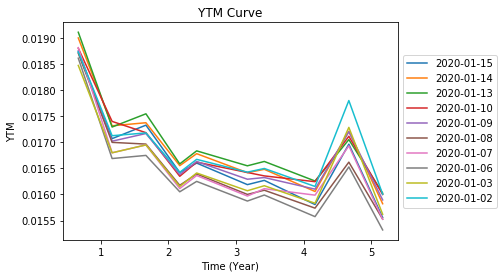

In [6]:
MatDate_list = ['2020-09-01', '2021-03-01', '2021-09-01', '2022-03-01',
                '2022-06-01', '2023-03-01', '2023-06-01', '2024-03-01', 
                '2024-09-01', '2025-03-01']
# Plot YTM
# Assuming the time to maturity to the nearest month
time_to_maturity = [8/12, 14/12, 20/12, 26/12, 29/12, 38/12, 41/12, 50/12, 56/12, 62/12]
for i in range(len(CurDate_list)):
    YTM = []
    for ind in range(len(ISIN_list)):
        ISIN = ISIN_list[ind]
        YTM.append(Bond_dict[ISIN][YTM_ind][i])
    plt.plot(time_to_maturity,YTM)
plt.legend(CurDate_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('YTM Curve')
plt.xlabel('Time (Year)')
plt.ylabel('YTM')

Text(0, 0.5, 'YTM')

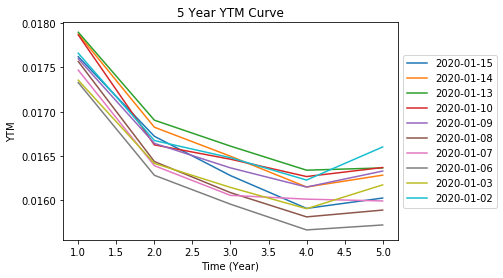

In [7]:
# Find the 1,2,3,4,5 year yield and plot
time = [1, 2, 3, 4, 5]
time_to_maturity = [8/12, 14/12, 20/12, 26/12, 29/12, 38/12, 41/12, 50/12, 56/12, 62/12]
YTM_transposed = YTM_list.transpose()
YTM_5year = []
for YTM_i in YTM_transposed:
    temp = np.interp(time, time_to_maturity, YTM_i)
    YTM_5year.append(temp)

# Plot
for i in range(len(CurDate_list)):
    plt.plot(time,YTM_5year[i])
plt.legend(CurDate_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('5 Year YTM Curve')
plt.xlabel('Time (Year)')
plt.ylabel('YTM')

## Part b) - Spot Rate

In [51]:
def spot_func(r):
    # This function calculate the spot rate of the last payment
    # without intepolation
    eqn = 0
    num_period = len(Spot_Rate_list)
    for i in range(num_period):
        rate = Spot_Rate_list[i]
        eqn = eqn + cashflow[i] * math.exp(-rate * (num_days/365 + i * 1/2))
    eqn = eqn + cashflow[-1] * math.exp(-r * (num_days/365 + num_period * 1/2))
    eqn = eqn - dirty_price
    return eqn

def spot_func_10year(r):
    # For the ten year bonds, we first need to intepolate all spot rates in Jun and Dec
    eqn = 0
    if ISIN == 'CA135087ZU15':
        Spot_Rate_time_intepolate = [5/12, 11/12, 17/12, 23/12]
        Spot_Rate_intepolate = np.interp(Spot_Rate_time_intepolate, Spot_Rate_time_5yr[:len(Spot_Rate_list)], Spot_Rate_list)
        num_period = len(Spot_Rate_intepolate)
        for i in range(num_period):
            rate = Spot_Rate_intepolate[i]
            eqn = eqn + cashflow[i] * math.exp(-rate * (num_days/365 + i * 1/2))
        eqn = eqn + cashflow[-1] * math.exp(-r * (num_days/365 + num_period * 1/2))
        eqn = eqn - dirty_price  
        return eqn
    # Second ten year bond
    else:
        Spot_Rate_time_intepolate = [5/12, 11/12, 17/12, 23/12, 29/12, 35/12]
        Spot_Rate_intepolate = (np.interp(Spot_Rate_time_intepolate, Spot_Rate_time_5yr[:len(Spot_Rate_list)], Spot_Rate_list)).tolist()
        Spot_Rate_time_intepolate[-2] = cur_spot_first_10yr
        num_period = len(Spot_Rate_intepolate)
        for i in range(num_period):
            rate = Spot_Rate_intepolate[i]
            eqn = eqn + cashflow[i] * math.exp(-rate * (num_days/365 + i * 1/2))
        eqn = eqn + cashflow[-1] * math.exp(-r * (num_days/365 + num_period * 1/2))
        eqn = eqn - dirty_price  
        return eqn

# Final variable
Spot_Rate_list_all = []
Spot_Rate_time_5yr = [2/12, 8/12, 14/12, 20/12, 26/12, 32/12, 38/12, 44/12, 50/12, 56/12, 62/12]
      # time_to_maturity = [8/12, 14/12, 20/12, 26/12, 29/12, 38/12, 41/12, 50/12, 56/12, 62/12]
Spot_first_10yr = []
Spot_second_10yr = []


for time_ind in range(len(CurDate_list)):
    # Assume the first spot rate is 1.64%, it corresponds to two month T-Bill rate
    Spot_Rate_list = [0.0164]
    for ISIN in ISIN_list:
        Bond_dict_element = Bond_dict[ISIN]
        clean_price = Bond_dict_element[price_ind][time_ind]
        AI = Bond_dict_element[AI_ind][time_ind]
        dirty_price = clean_price + AI
        cashflow = Bond_dict_element[cashflow_ind]
        num_days = Bond_dict_element[DaysNextPayment_ind][time_ind]
        
        if ISIN == 'CA135087ZU15': # The first ten year bond
            # This is the spot rate at Jun 22
            spot_rate = fsolve(spot_func_10year,0)[0]
            cur_spot_first_10yr = spot_rate
            # Assume Sep 22 is the same as this spot rate
            Spot_Rate_list.append(spot_rate)
        
        elif ISIN == 'CA135087A610': # The second ten year bond
            # This is the spot rate at Jun 23
            spot_rate = fsolve(spot_func_10year,0)[0]
            cur_spot_second_10yr = spot_rate
            # Assume Sep 23 is the same as this spot rate
            Spot_Rate_list.append(spot_rate)

        else: # normal 5 year
            spot_rate = fsolve(spot_func,0)[0]
            Spot_Rate_list.append(spot_rate)

    Spot_Rate_list_all.append(Spot_Rate_list)
    Spot_first_10yr.append(cur_spot_first_10yr)
    Spot_second_10yr.append(cur_spot_second_10yr)

Spot_Rate_list_all = np.array(Spot_Rate_list_all).squeeze()

Text(0, 0.5, 'Spot Rate')

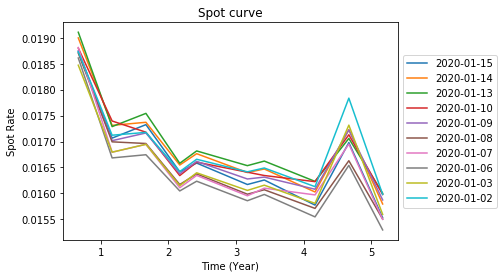

In [48]:
# Plot Spot Curve
for i in range(len(CurDate_list)):
    time_to_maturity = [8/12, 14/12, 20/12, 26/12, 29/12, 38/12, 41/12, 50/12, 56/12, 62/12]
    plt.plot(time_to_maturity, Spot_Rate_list_all[i][1:])
plt.legend(CurDate_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Spot curve')
plt.xlabel('Time (Year)')
plt.ylabel('Spot Rate')

Text(0, 0.5, 'Spot rate')

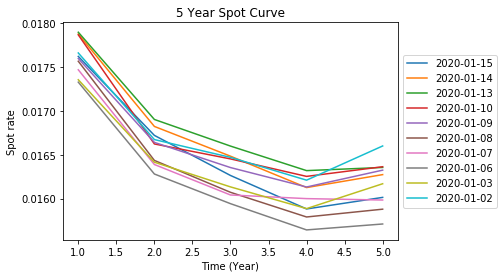

In [49]:
# Find the 1,2,3,4,5 year yield and plot
time = [1, 2, 3, 4, 5]
time_to_maturity = [8/12, 14/12, 20/12, 26/12, 29/12, 38/12, 41/12, 50/12, 56/12, 62/12]
Spot_5year = []
for Spot_i in Spot_Rate_list_all:
    temp = np.interp(time, time_to_maturity, Spot_i[1:])
    Spot_5year.append(temp)

# Plot
for i in range(len(CurDate_list)):
    plt.plot(time, Spot_5year[i])
plt.legend(CurDate_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('5 Year Spot Curve')
plt.xlabel('Time (Year)')
plt.ylabel('Spot rate')

## Part c)

In [13]:
# Get the spot rate
Spot_Rate_c = np.array(Spot_5year)

# Calculate the Spot rate
forward_rate = []
bond_dim = Spot_Rate_c.shape[1]
time_dim = Spot_Rate_c.shape[0]
for time_ind in range(time_dim):
    forward = []
    for bond_ind in range(bond_dim - 1):
        f_1 = Spot_Rate_c[time_ind, 0]
        f_n = Spot_Rate_c[time_ind, bond_ind + 1]
        f_1_n = (f_n * (bond_ind + 2) - f_1) / (bond_ind + 1)
        forward.append(f_1_n)
    forward_rate.append(forward)
forward_rate = np.array(forward_rate)

Text(0, 0.5, 'Forward Rate')

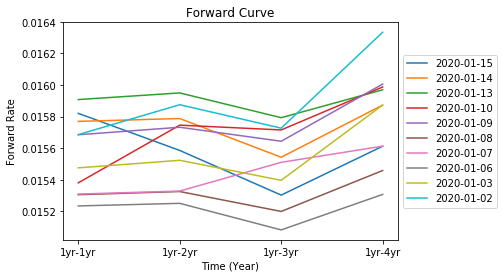

In [14]:
# Plot Forward Curve
for i in range(len(forward_rate)):
    x_axis = ['1yr-1yr', '1yr-2yr', '1yr-3yr', '1yr-4yr']
    plt.plot(x_axis,forward_rate[i])
plt.legend(CurDate_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Forward Curve')
plt.xlabel('Time (Year)')
plt.ylabel('Forward Rate')

# Question 5

In [16]:
def convert_logreturn(mat):
    # compute the log return on column dimension
    x_dim = mat.shape[0]
    y_dim = mat.shape[1]
    log_return_mat = []
    
    # reorder the timesereis from earliest to latests
    for x_ind in range(x_dim):
        mat[x_ind] = mat[x_ind][::-1]
    
    for x_ind in range(x_dim):
        log_return = []
        for y_ind in range(y_dim - 1):
            log_return.append(math.log(mat[x_ind, y_ind + 1]/mat[x_ind, y_ind]))
        log_return_mat.append(log_return)
    return np.array(log_return_mat)

### Yield

In [17]:
Yield_2 = np.array(YTM_5year)
Yield_2_logreturn = convert_logreturn(Yield_2.transpose())
Yield_2_cov = np.cov(Yield_2_logreturn)
print(Yield_2_cov)

[[1.05333073e-04 6.01778978e-05 9.59555928e-05 1.07592683e-04
  1.13805947e-04]
 [6.01778978e-05 1.06261117e-04 1.16881502e-04 1.28180640e-04
  1.49589689e-04]
 [9.59555928e-05 1.16881502e-04 1.52545341e-04 1.75059030e-04
  2.05344517e-04]
 [1.07592683e-04 1.28180640e-04 1.75059030e-04 2.62952030e-04
  2.77409295e-04]
 [1.13805947e-04 1.49589689e-04 2.05344517e-04 2.77409295e-04
  3.38470684e-04]]


### Forward Rates

In [18]:
Forward_2_logreturn = convert_logreturn(forward_rate.transpose())
Forward_2_cov = np.cov(Forward_2_logreturn)
print(Forward_2_cov)

[[0.00033195 0.0002166  0.00020667 0.00024246]
 [0.0002166  0.00024135 0.00026502 0.00030877]
 [0.00020667 0.00026502 0.00042025 0.00041545]
 [0.00024246 0.00030877 0.00041545 0.00049108]]


# Questoin 6

In [61]:
# For Yield
w,v = LA.eig(Yield_2_cov)
print ('Eigen values for Yield Cov Matrix are')
print (w)
print ('Eigen vectors Yield Cov Matrix are')
print (v)

Eigen values for Yield Cov Matrix are
[8.38105805e-04 6.32949076e-05 4.15110317e-05 2.88997338e-06
 1.97605264e-05]
Eigen vectors Yield Cov Matrix are
[[ 0.25412185  0.84298434 -0.37121448 -0.26761411  0.12402412]
 [ 0.30719992  0.12662582  0.76131095 -0.48891031 -0.26639531]
 [ 0.4106742   0.26375743  0.33829625  0.79823785  0.10075067]
 [ 0.53903824 -0.21634829 -0.39645341  0.0516797  -0.70907341]
 [ 0.6179278  -0.39619281 -0.10481313 -0.22247458  0.63302114]]


In [60]:
# For Forward Curve
w,v = LA.eig(Forward_2_cov)
print ('Eigen values for Forward Cov Matrix are')
print (w)
print ('Eigen vectors for Forward Cov Matrix are')
print (v)

Eigen values for Forward Cov Matrix are
[1.23349852e-03 1.88890832e-04 2.02759188e-05 4.19602833e-05]
Eigen vectors for Forward Cov Matrix are
[[ 0.39037168  0.86410835  0.24473327 -0.20256443]
 [ 0.42094153  0.12997932 -0.80998988  0.38707881]
 [ 0.5474261  -0.38309526 -0.12729452 -0.7330476 ]
 [ 0.60888656 -0.29943307  0.51751148  0.52132414]]
